# Building a RNN on SMILES data

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [25]:
import pandas as pd
import numpy as np
import os
import pickle



from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%run ../assets/confusion_matrix.py # function to plot accuracy and loss
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

## Read in data

In [3]:
df = pd.read_csv("../data/CID_properties_nr.csv")

In [4]:
# lowercase column names
df.columns = df.columns.str.lower()

In [5]:
df["drug_class"].value_counts()

antiinfective          2396
antineoplastic         1174
cns                    1141
cardio                  787
antiinflammatory        372
hematologic             268
gastrointestinal        255
lipidregulating         164
reproductivecontrol     148
dermatologic            108
respiratorysystem       100
urological               22
Name: drug_class, dtype: int64

In [6]:
# remove extra classes
index_names = df[(df["drug_class"] == "antiinfective") | (df["drug_class"] == "antiinflammatory") | (df["drug_class"] == "hematologic") | (df["drug_class"] == "gastrointestinal") | (df["drug_class"] == "hematologic") | (df["drug_class"] == "lipidregulating") | (df["drug_class"] == "reproductivecontrol") | (df["drug_class"] == "dermatologic") | (df["drug_class"] == "respiratorysystem")  | (df["drug_class"] == "urological")].index

df.drop(index_names, axis = 0, inplace = True)

In [7]:
df["drug_class"].value_counts()

antineoplastic    1174
cns               1141
cardio             787
Name: drug_class, dtype: int64

In [8]:
def eda(df):
    nulls = pd.DataFrame(df.isnull().sum()).T # Check for nulls
    datatypes = pd.DataFrame(df.dtypes).T # Check datatypes
    summary = pd.concat([nulls, datatypes], keys = ["nulls", "datatypes"]) # Create pandas dataframe, because I think it's easier to read
    return summary

In [9]:
eda(df)

,,cid,hbondacceptorcount,hbonddonorcount,isomericsmiles,molecularweight,xlogp,drug_class,desalted_smiles
nulls,0,0,0,0,0,0,947,0,0
datatypes,0,int64,int64,int64,object,float64,float64,object,object


## Set up X and y variables

In [10]:
df.dropna(inplace = True)

In [11]:
X = df.drop(columns = ["cid", "isomericsmiles", "drug_class", "desalted_smiles"])
y = df["drug_class"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y)

# Build model

In [14]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [15]:
svc = SVC(C=2,gamma='scale', kernel='linear', probability=True)

svc.fit(X_train_sc, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [20]:
preds = svc.predict(X_test_sc)

In [23]:
# Measure performance based on accuracy.
val_acc = accuracy_score(y_test, y_preds)

Confusion matrix, without normalization
[[152  79   0]
 [ 44 134   0]
 [ 80  50   0]]


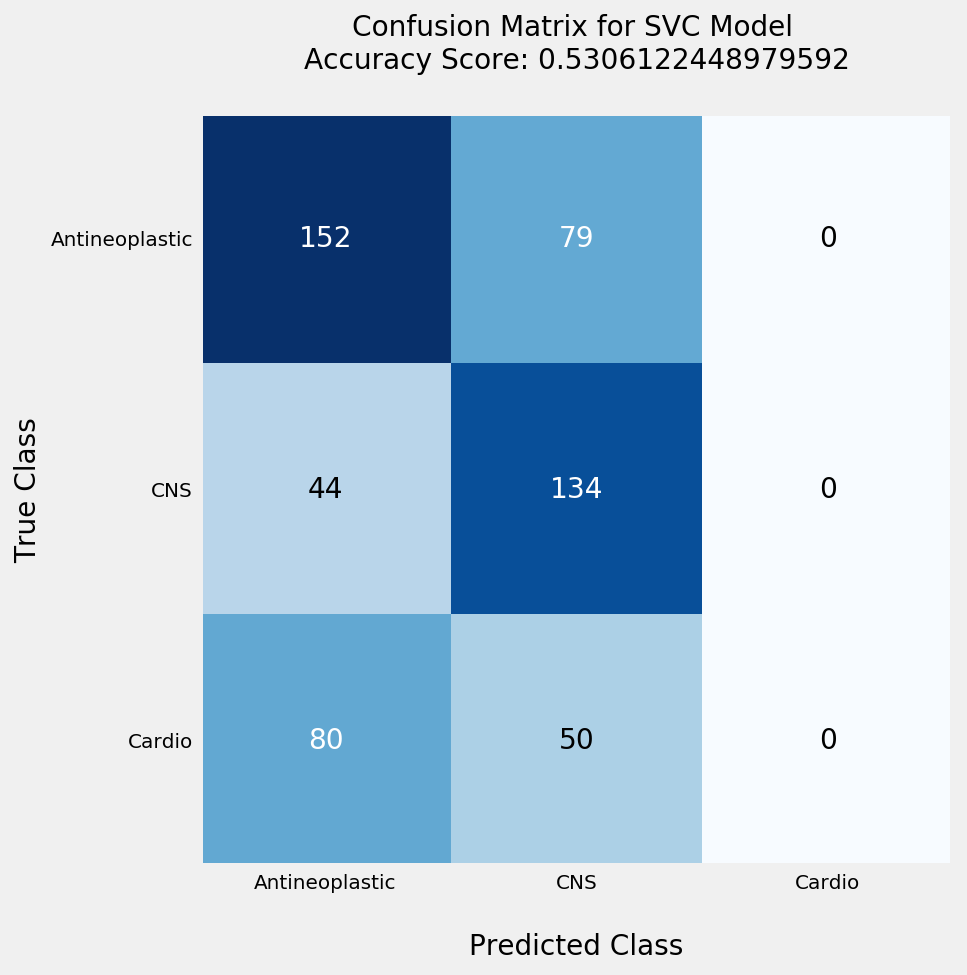

In [27]:
# Look at confusion matrix
cnf_matrix = confusion_matrix(y_test, preds,labels=['antineoplastic', 'cns', 'cardio'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (7, 7))
plot_confusion_matrix(cnf_matrix, classes=['Antineoplastic', 'CNS', 'Cardio'],
                      title=f'Confusion Matrix for SVC Model \nAccuracy Score: {val_acc}\n' )
plt.savefig("../plots/confusion_matrix_SVC.png", dpi = 150);